<h1 style="color:white;background-color:black;text-align:center;font-size:350%;font-family:monotype corsiva">Karan Agrawal</h1><h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Corona Virus Report</h2>

## Scrapping the Data

* In this section we will scrap details of coronavirus of three continuous days.
* The Source is https://www.worldometers.info/coronavirus/ .
* Date of Data is 20-June.
* So we will have data of 18-June ,19-June and 20-June.
* Whole Data is in list 'corona'.

In [1]:
print("-> Importing Libraries...")

import requests
import bs4

print("-> Done.")

print("-> Requesting Data...")

r=requests.get("https://www.worldometers.info/coronavirus/")

print("-> Done.")

print("-> Making Soup...")

soup=bs4.BeautifulSoup(r.text)

print("-> Done.")

corona=[[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []],
        [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []],
        [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]]

print("-> Searching and Writing Data... ")

data=soup.find_all('tr',style_="",class_="")

for i,headings in enumerate(range(0,648,216)):
    head=data[headings].find_all("th")[:15]
    
    for j,heading in enumerate(head):
        corona[i][j].append(heading.text.strip())        

for detail in range(1,216):
    details=data[detail]
    
    for i,k in enumerate(range(0,648,216)):
        j=detail+i
    
        for j,every_detail in enumerate(details.find_all('td')[:15]):
                corona[i][j].append(every_detail.text.strip())

print("-> Done.")
print("-> Data is in list 'corona'")

-> Importing Libraries...
-> Done.
-> Requesting Data...
-> Done.
-> Making Soup...
-> Done.
-> Searching and Writing Data... 
-> Done.
-> Data is in list 'corona'


In [2]:
print(len(corona),end=" By ")
print(len(corona[0]),end=" By ")
print(len(corona[0][0]))

3 By 15 By 216


## Making Dataframes

In this section we will make three Data Frames:
* today
* yesterday
* day_before_yesterday

Features of all DataFrames are:
* s_no
* name
* total_cases
* new_cases
* total_deaths
* new_deaths
* total_recovered
* new_recovered
* active_cases
* serious_critical
* total_per_m
* death_per_m
* tests
* tests_per_m
* population

In [3]:
import pandas as pd
print("-> Creating Dataframes...")
features=[
    's_no',
    'name',
    'total_cases',
    'new_cases',
    'total_deaths',
    'new_deaths',
    'total_recovered',
    'new_recovered',
    'active_cases',
    'serious_critical',
    'total_per_m',
    'death_per_m',
    'tests',
    'tests_per_m',
    'population',
]


today=pd.DataFrame(
    {features[i]:corona[0][i] for i in range(15)},
)

yesterday=pd.DataFrame(
    {features[i]:corona[1][i] for i in range(15)},
)

day_before_yesterday=pd.DataFrame(
    {features[i]:corona[2][i] for i in range(15)},
)
print("-> Dataframes Created.")

-> Creating Dataframes...
-> Dataframes Created.


In [4]:
today

,s_no,name,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
1,1,USA,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
2,2,Brazil,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
3,3,Russia,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
4,4,India,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,St. Barth,6,,,,6,,0,,608,,152,"15,391","9,876"
212,212,Lesotho,4,,,,2,,2,,2,,"1,515",707,"2,141,718"
213,213,Anguilla,3,,,,3,,0,,200,,93,"6,200","14,999"
214,214,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,795"


In [5]:
yesterday

,s_no,name,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
1,1,USA,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
2,2,Brazil,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
3,3,Russia,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
4,4,India,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,St. Barth,6,,,,6,,0,,608,,152,"15,391","9,876"
212,212,Lesotho,4,,,,2,,2,,2,,"1,515",707,"2,141,718"
213,213,Anguilla,3,,,,3,,0,,200,,93,"6,200","14,999"
214,214,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,795"


In [6]:
day_before_yesterday

,s_no,name,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
1,1,USA,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
2,2,Brazil,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
3,3,Russia,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
4,4,India,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,St. Barth,6,,,,6,,0,,608,,152,"15,391","9,876"
212,212,Lesotho,4,,,,2,,2,,2,,"1,515",707,"2,141,718"
213,213,Anguilla,3,,,,3,,0,,200,,93,"6,200","14,999"
214,214,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,795"


## Writing the Data in CSV and HTML Files

* In this section we will create a direcory corona if it do not exist.
* We will write all data in csv files and html files as:
    * corona\\today.csv
    * corona\\yesterday.csv
    * corona\\day_before_yesterday.csv
    * corona\\today.html
    * corona\\yesterday.html
    * corona\\day_before_yesterday.html

In [7]:
import os
print("-> Writing Files...")
try:  
    os.mkdir("corona")  
except OSError as error:  
    pass
today.to_csv("corona\\today.csv")
yesterday.to_csv("corona\\yesterday.csv")
day_before_yesterday.to_csv("corona\\day_before_yesterday.csv")

today.to_html("corona\\today.html")
yesterday.to_html("corona\\yesterday.html")
day_before_yesterday.to_html("corona\\day_before_yesterday.html")

print("-> Files Written.")

-> Writing Files...
-> Files Written.


## Read Again CSV files

In [8]:
today=pd.read_csv("corona\\today.csv")
yesterday=pd.read_csv("corona\\yesterday.csv")
day_before_yesterday=pd.read_csv("corona\\day_before_yesterday.csv")

## Wrangling

In this section we will:

* Remove first row

In [9]:
today

,Unnamed: 0,s_no,name,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
0,0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
1,1,1,USA,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
2,2,2,Brazil,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
3,3,3,Russia,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
4,4,4,India,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,211,St. Barth,6,NaN,NaN,NaN,6,NaN,0,NaN,608,NaN,152,"15,391","9,876"
212,212,212,Lesotho,4,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,"1,515",707,"2,141,718"
213,213,213,Anguilla,3,NaN,NaN,NaN,3,NaN,0,NaN,200,NaN,93,"6,200","14,999"
214,214,214,Saint Pierre Miquelon,1,NaN,NaN,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,795"


In [10]:
today.drop(0,inplace=True)
yesterday.drop(0,inplace=True)
day_before_yesterday.drop(0,inplace=True)

In [11]:
today

,Unnamed: 0,s_no,name,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
1,1,1,USA,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
2,2,2,Brazil,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
3,3,3,Russia,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
4,4,4,India,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
5,5,5,UK,"303,110","+1,295","42,589",+128,NaN,NaN,NaN,379,"4,466",627,"7,714,201","113,652","67,875,356"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,211,St. Barth,6,NaN,NaN,NaN,6,NaN,0,NaN,608,NaN,152,"15,391","9,876"
212,212,212,Lesotho,4,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,"1,515",707,"2,141,718"
213,213,213,Anguilla,3,NaN,NaN,NaN,3,NaN,0,NaN,200,NaN,93,"6,200","14,999"
214,214,214,Saint Pierre Miquelon,1,NaN,NaN,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,795"


* Index name

In [12]:
today.set_index("name",inplace=True)
yesterday.set_index("name",inplace=True)
day_before_yesterday.set_index("name",inplace=True)

In [13]:
today

,Unnamed: 0,s_no,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
name,,,,,,,,,,,,,,,
USA,1,1,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
Brazil,2,2,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
Russia,3,3,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
India,4,4,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
UK,5,5,"303,110","+1,295","42,589",+128,NaN,NaN,NaN,379,"4,466",627,"7,714,201","113,652","67,875,356"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Barth,211,211,6,NaN,NaN,NaN,6,NaN,0,NaN,608,NaN,152,"15,391","9,876"
Lesotho,212,212,4,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,"1,515",707,"2,141,718"
Anguilla,213,213,3,NaN,NaN,NaN,3,NaN,0,NaN,200,NaN,93,"6,200","14,999"


* Drop Unnamed Column

In [14]:
today.drop("Unnamed: 0",axis=1,inplace=True)
yesterday.drop("Unnamed: 0",axis=1,inplace=True)
day_before_yesterday.drop("Unnamed: 0",axis=1,inplace=True)

In [15]:
today

,s_no,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
name,,,,,,,,,,,,,,
USA,1,"2,313,879","+16,689","121,652",+245,"958,234","+2,173","1,233,993","16,531","6,992",368,"27,555,383","83,263","330,944,050"
Brazil,2,"1,043,168","+4,600","49,156",+66,"543,186","+22,826","450,826","8,318","4,909",231,"2,409,830","11,340","212,512,836"
Russia,3,"576,952","+7,889","8,002",+161,"334,592","+10,186","234,358","2,300","3,954",55,"16,661,287","114,171","145,932,745"
India,4,"403,815","+8,003","13,109",+139,"218,969","+4,763","171,737","8,944",293,10,"6,616,496","4,796","1,379,567,062"
UK,5,"303,110","+1,295","42,589",+128,NaN,NaN,NaN,379,"4,466",627,"7,714,201","113,652","67,875,356"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Barth,211,6,NaN,NaN,NaN,6,NaN,0,NaN,608,NaN,152,"15,391","9,876"
Lesotho,212,4,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,"1,515",707,"2,141,718"
Anguilla,213,3,NaN,NaN,NaN,3,NaN,0,NaN,200,NaN,93,"6,200","14,999"


* Change all columns to int type

In [16]:
today.dtypes

s_no                object
total_cases         object
new_cases           object
total_deaths        object
new_deaths          object
total_recovered     object
new_recovered       object
active_cases        object
serious_critical    object
total_per_m         object
death_per_m         object
tests               object
tests_per_m         object
population          object
dtype: object

In [17]:
import numpy as np
def num_from_string(x):
    x="".join(str(x).split(","))
    if x=="nan":
        return np.nan
    return float(x)
all_columns=today.columns
numerical_columns=all_columns[1:]
for col in numerical_columns:
    today[col]=today[col].apply(num_from_string)
    yesterday[col]=today[col].apply(num_from_string)
    day_before_yesterday[col]=today[col].apply(num_from_string)
    

In [18]:
today.dtypes

s_no                 object
total_cases         float64
new_cases           float64
total_deaths        float64
new_deaths          float64
total_recovered     float64
new_recovered       float64
active_cases        float64
serious_critical    float64
total_per_m         float64
death_per_m         float64
tests               float64
tests_per_m         float64
population          float64
dtype: object

In [19]:
yesterday.dtypes

s_no                 object
total_cases         float64
new_cases           float64
total_deaths        float64
new_deaths          float64
total_recovered     float64
new_recovered       float64
active_cases        float64
serious_critical    float64
total_per_m         float64
death_per_m         float64
tests               float64
tests_per_m         float64
population          float64
dtype: object

In [20]:
today

,s_no,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
name,,,,,,,,,,,,,,
USA,1,2313879.0,16689.0,121652.0,245.0,958234.0,2173.0,1233993.0,16531.0,6992.0,368.0,27555383.0,83263.0,3.309440e+08
Brazil,2,1043168.0,4600.0,49156.0,66.0,543186.0,22826.0,450826.0,8318.0,4909.0,231.0,2409830.0,11340.0,2.125128e+08
Russia,3,576952.0,7889.0,8002.0,161.0,334592.0,10186.0,234358.0,2300.0,3954.0,55.0,16661287.0,114171.0,1.459327e+08
India,4,403815.0,8003.0,13109.0,139.0,218969.0,4763.0,171737.0,8944.0,293.0,10.0,6616496.0,4796.0,1.379567e+09
UK,5,303110.0,1295.0,42589.0,128.0,NaN,NaN,NaN,379.0,4466.0,627.0,7714201.0,113652.0,6.787536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Barth,211,6.0,NaN,NaN,NaN,6.0,NaN,0.0,NaN,608.0,NaN,152.0,15391.0,9.876000e+03
Lesotho,212,4.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1515.0,707.0,2.141718e+06
Anguilla,213,3.0,NaN,NaN,NaN,3.0,NaN,0.0,NaN,200.0,NaN,93.0,6200.0,1.499900e+04


In [21]:
today.sort_values("total_cases",ascending=False,inplace=True)
yesterday.sort_values("total_cases",ascending=False,inplace=True)
day_before_yesterday.sort_values("total_cases",ascending=False,inplace=True)

In [22]:
today

,s_no,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
name,,,,,,,,,,,,,,
USA,1,2313879.0,16689.0,121652.0,245.0,958234.0,2173.0,1233993.0,16531.0,6992.0,368.0,27555383.0,83263.0,3.309440e+08
Brazil,2,1043168.0,4600.0,49156.0,66.0,543186.0,22826.0,450826.0,8318.0,4909.0,231.0,2409830.0,11340.0,2.125128e+08
Russia,3,576952.0,7889.0,8002.0,161.0,334592.0,10186.0,234358.0,2300.0,3954.0,55.0,16661287.0,114171.0,1.459327e+08
India,4,403815.0,8003.0,13109.0,139.0,218969.0,4763.0,171737.0,8944.0,293.0,10.0,6616496.0,4796.0,1.379567e+09
UK,5,303110.0,1295.0,42589.0,128.0,NaN,NaN,NaN,379.0,4466.0,627.0,7714201.0,113652.0,6.787536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caribbean Netherlands,210,7.0,NaN,NaN,NaN,7.0,NaN,0.0,NaN,267.0,NaN,424.0,16174.0,2.621500e+04
St. Barth,211,6.0,NaN,NaN,NaN,6.0,NaN,0.0,NaN,608.0,NaN,152.0,15391.0,9.876000e+03
Lesotho,212,4.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1515.0,707.0,2.141718e+06


## Writing the wrangled data in CSV and HTML Files

* We will update all data in csv files and html files as:
    * corona\\today.csv
    * corona\\yesterday.csv
    * corona\\day_before_yesterday.csv
    * corona\\today.html
    * corona\\yesterday.html
    * corona\\day_before_yesterday.html

In [23]:
print("-> Writing Files")

today.to_csv("corona\\today.csv")
yesterday.to_csv("corona\\yesterday.csv")
day_before_yesterday.to_csv("corona\\day_before_yesterday.csv")

today.to_html("corona\\today.html")
yesterday.to_html("corona\\yesterday.html")
day_before_yesterday.to_html("corona\\day_before_yesterday.html")

print("-> Files Written.")

-> Writing Files
-> Files Written.


## Visualisation

In this section we will visualise the data we have wrangled.

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
today

,s_no,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_per_m,death_per_m,tests,tests_per_m,population
name,,,,,,,,,,,,,,
USA,1,2313879.0,16689.0,121652.0,245.0,958234.0,2173.0,1233993.0,16531.0,6992.0,368.0,27555383.0,83263.0,3.309440e+08
Brazil,2,1043168.0,4600.0,49156.0,66.0,543186.0,22826.0,450826.0,8318.0,4909.0,231.0,2409830.0,11340.0,2.125128e+08
Russia,3,576952.0,7889.0,8002.0,161.0,334592.0,10186.0,234358.0,2300.0,3954.0,55.0,16661287.0,114171.0,1.459327e+08
India,4,403815.0,8003.0,13109.0,139.0,218969.0,4763.0,171737.0,8944.0,293.0,10.0,6616496.0,4796.0,1.379567e+09
UK,5,303110.0,1295.0,42589.0,128.0,NaN,NaN,NaN,379.0,4466.0,627.0,7714201.0,113652.0,6.787536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caribbean Netherlands,210,7.0,NaN,NaN,NaN,7.0,NaN,0.0,NaN,267.0,NaN,424.0,16174.0,2.621500e+04
St. Barth,211,6.0,NaN,NaN,NaN,6.0,NaN,0.0,NaN,608.0,NaN,152.0,15391.0,9.876000e+03
Lesotho,212,4.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1515.0,707.0,2.141718e+06


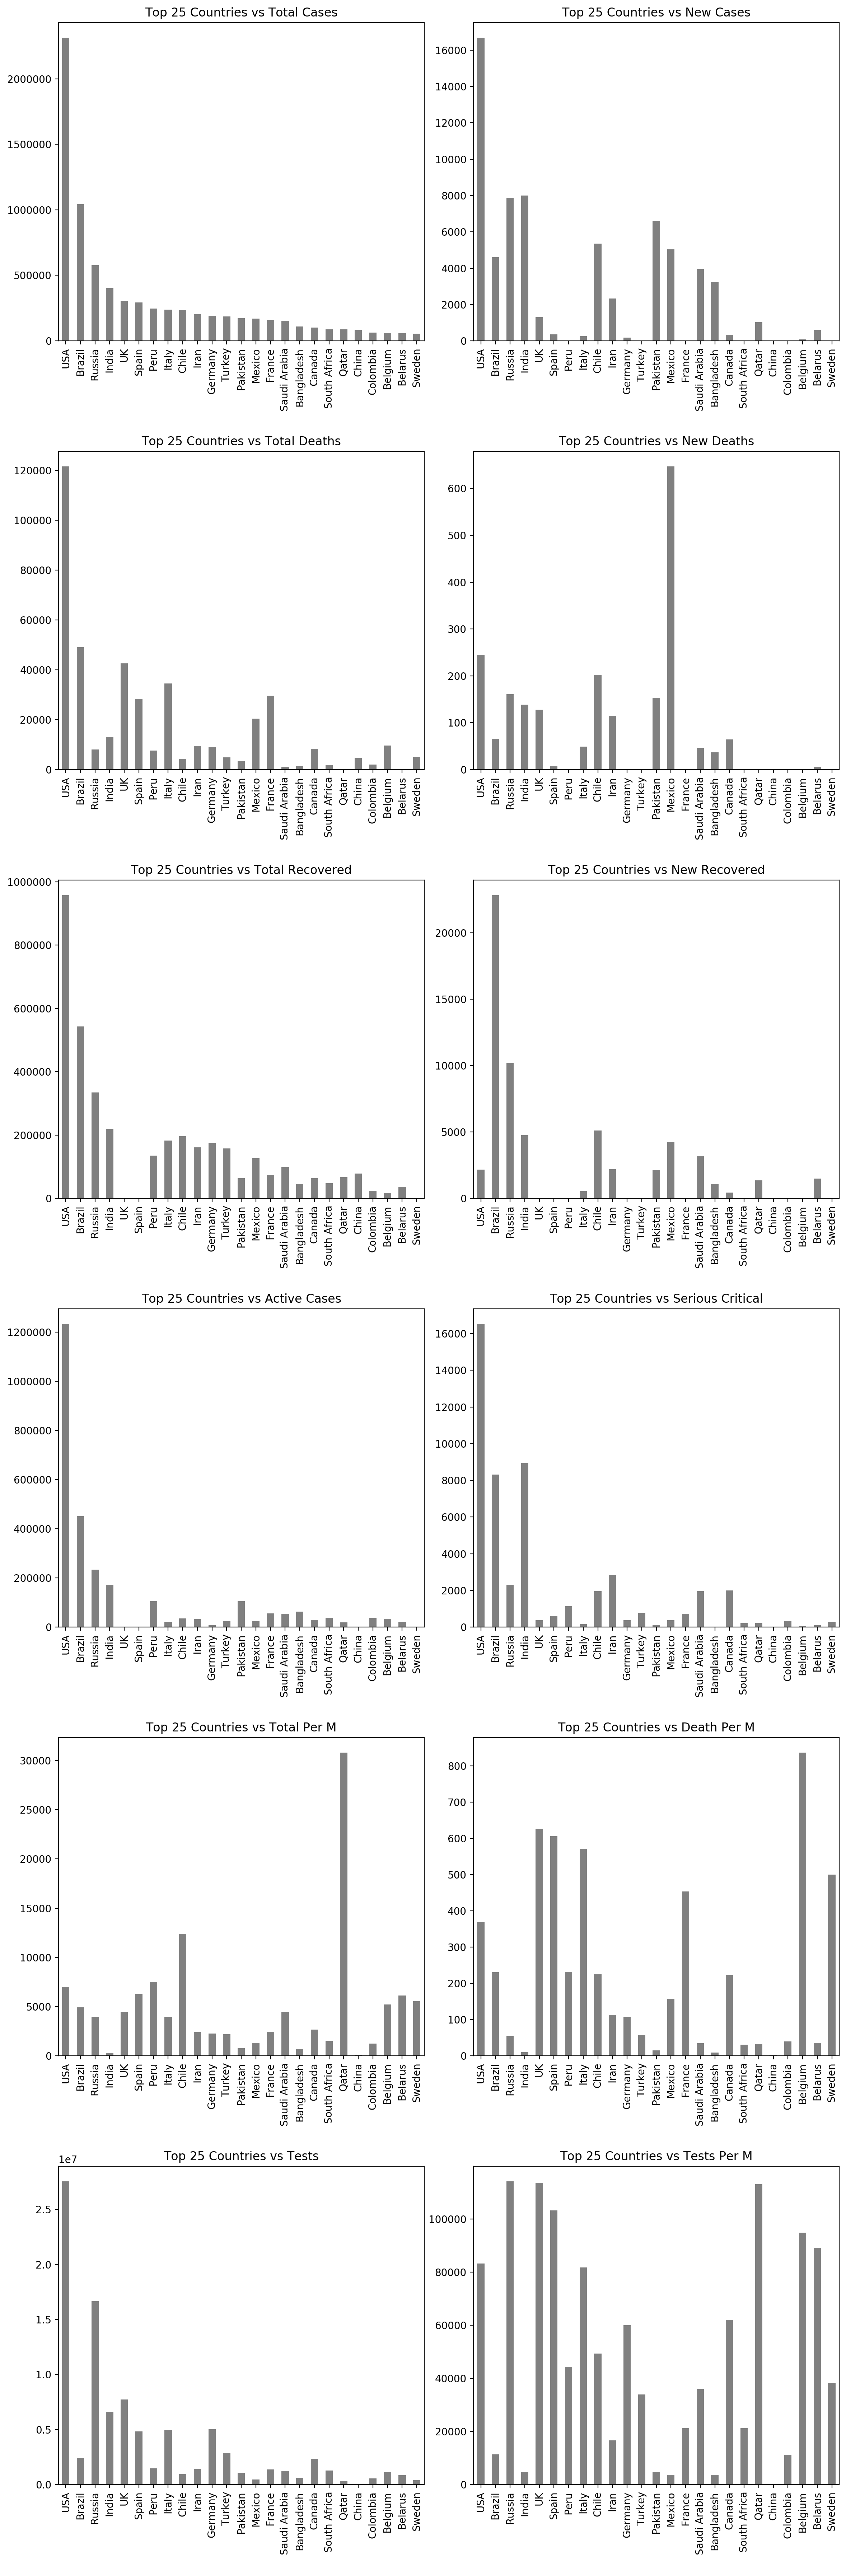

In [26]:
fig,ax=plt.subplots(nrows=6,ncols=2,figsize=(12,36),dpi=200)
for i in range(12):
    fig.tight_layout()
    x=i%2
    y=i//2
    today[numerical_columns[i]][:25].plot(kind="bar",ax=ax[y][x],color="gray")
    t=" ".join(numerical_columns[i].split("_")).title()
    ax[y][x].set_title(f"Top 25 Countries vs {t}")
    ax[y][x].set_xlabel(" ")
    ax[y][x].set_xticklabels(today[numerical_columns[i]][:25].index,rotation=90)
plt.show()

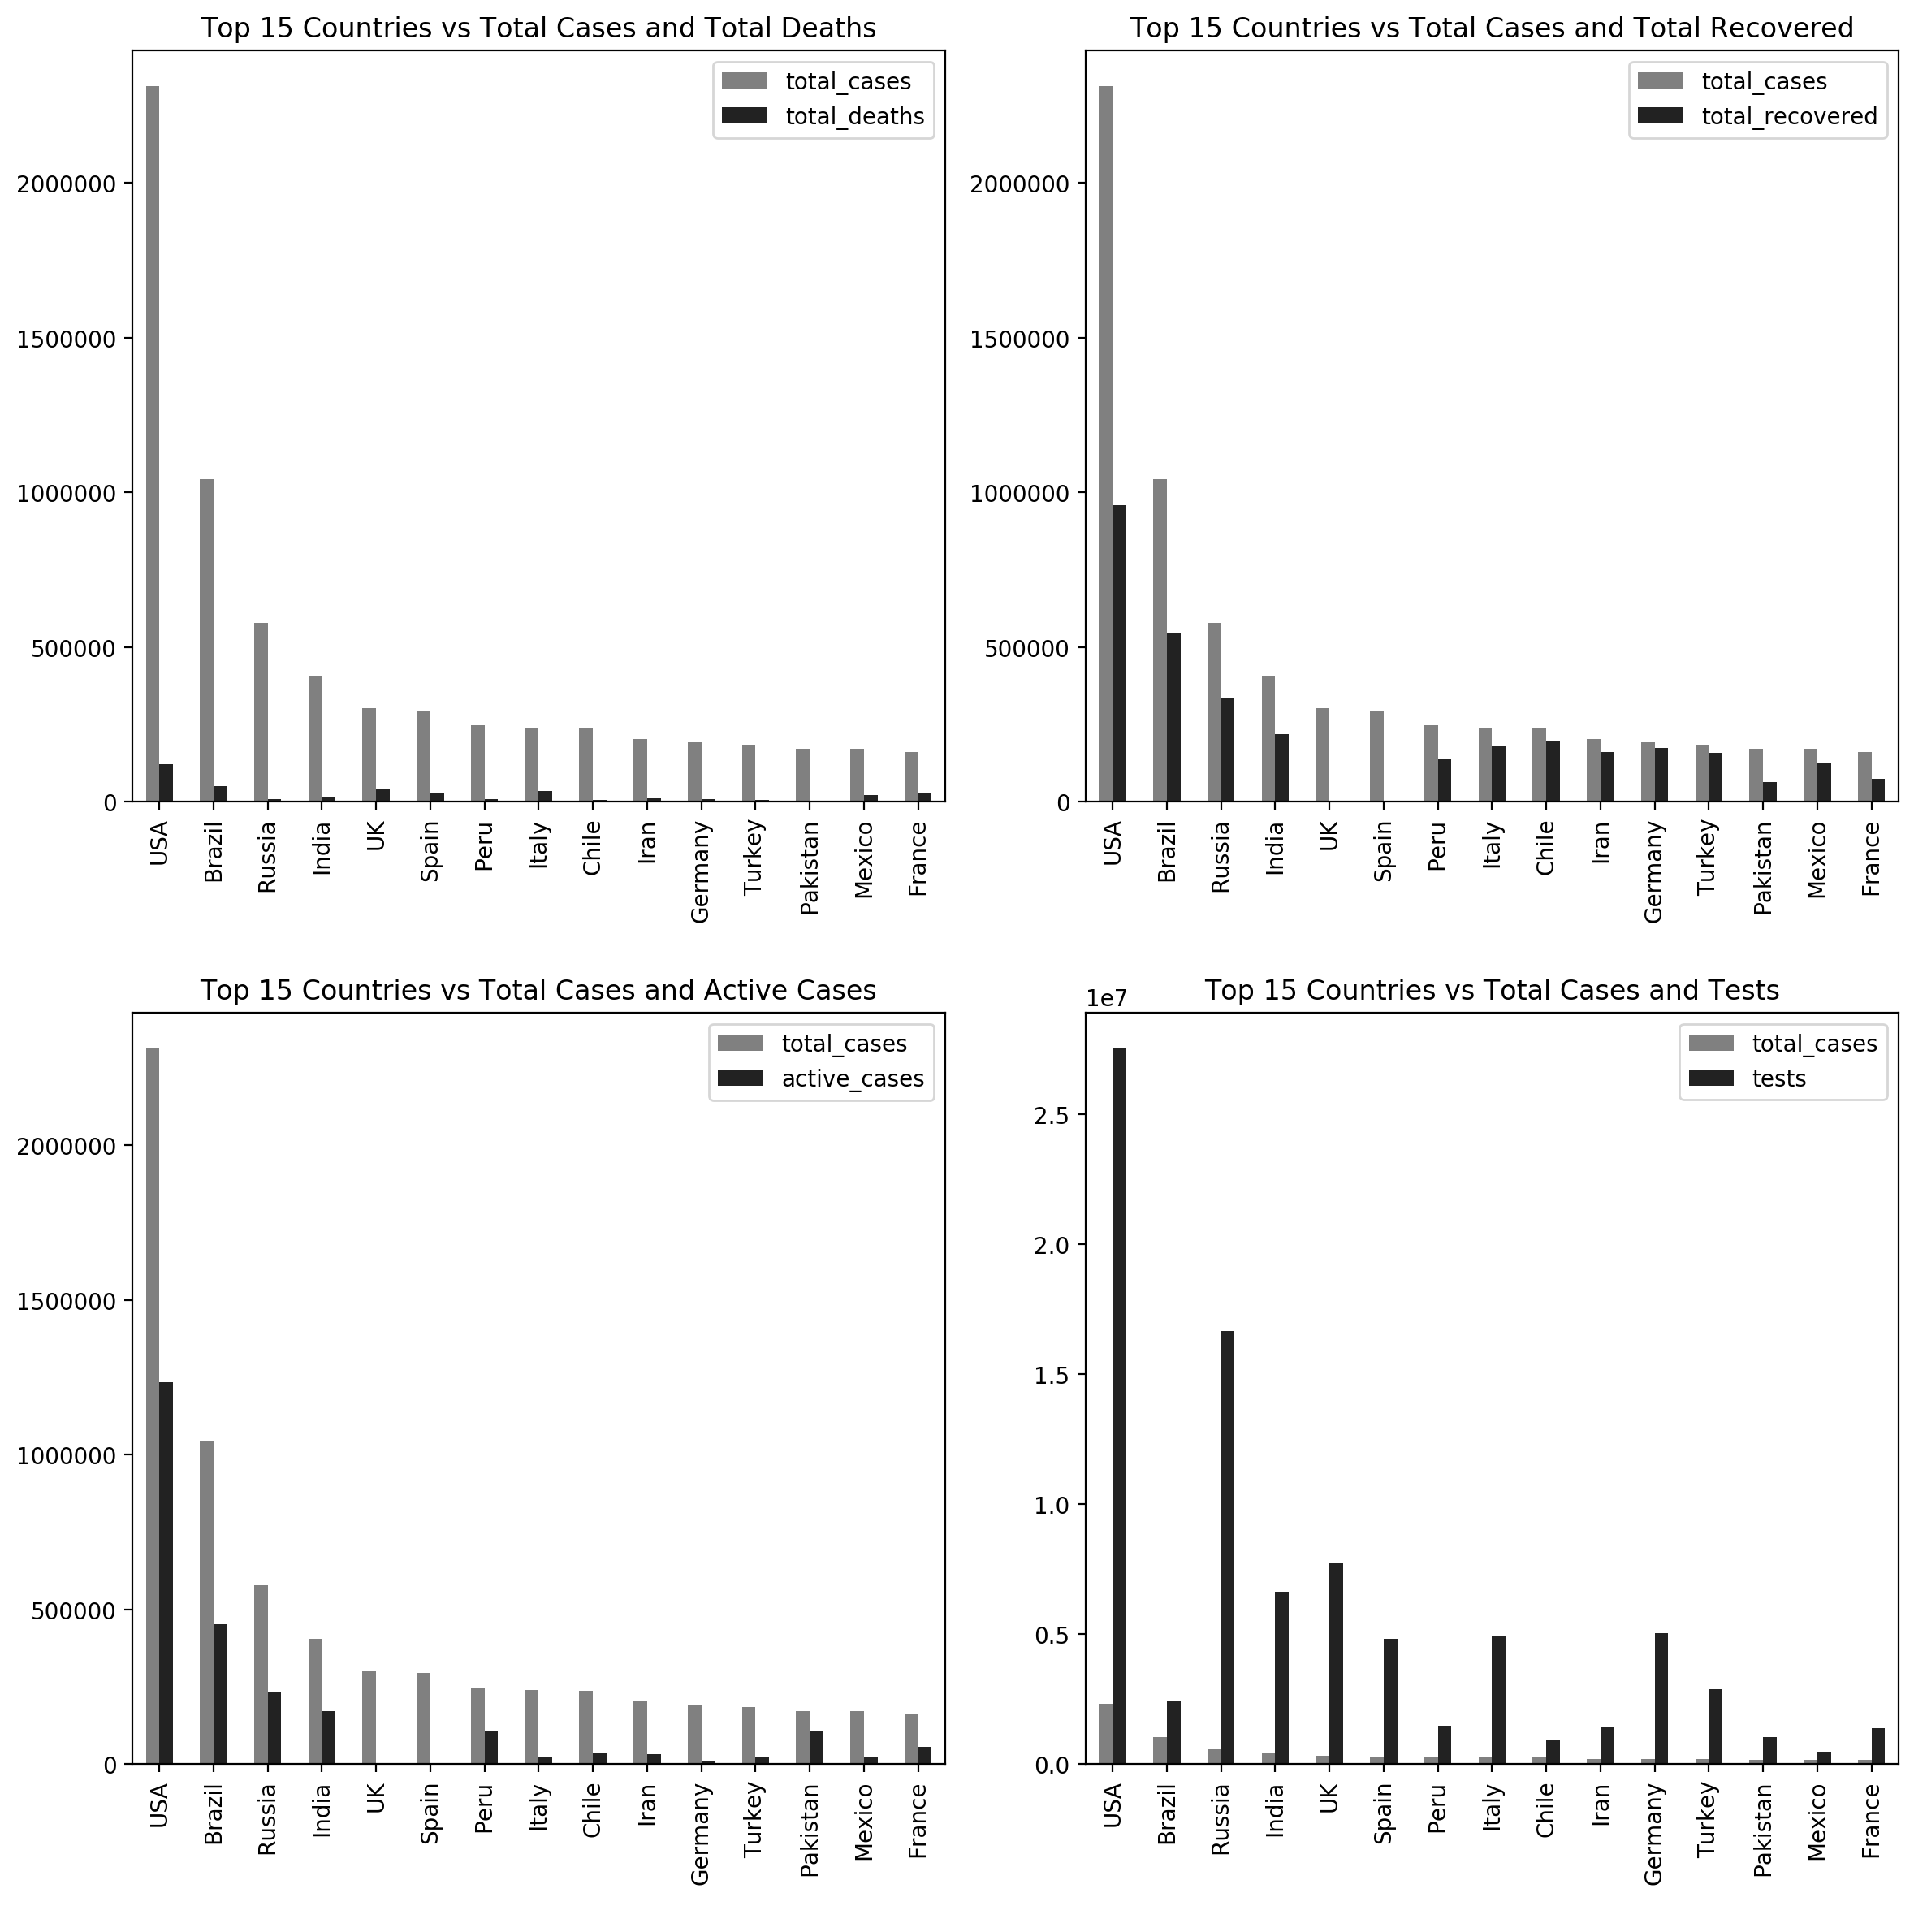

In [27]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,12),dpi=200)
cols=["total_deaths","total_recovered","active_cases","tests"]
for i in range(4):
    fig.tight_layout()
    x=i%2
    y=i//2
    today[["total_cases",cols[i]]][:15].plot(kind="bar",ax=ax[y][x],color=["gray","#222222"])
    t=" ".join(cols[i].split("_")).title()
    ax[y][x].set_title(f"Top 15 Countries vs Total Cases and {t}")
    ax[y][x].set_xlabel(" ")
    ax[y][x].set_xticklabels(today[numerical_columns[i]][:15].index,rotation=90)
plt.show()

C:\Users\karan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


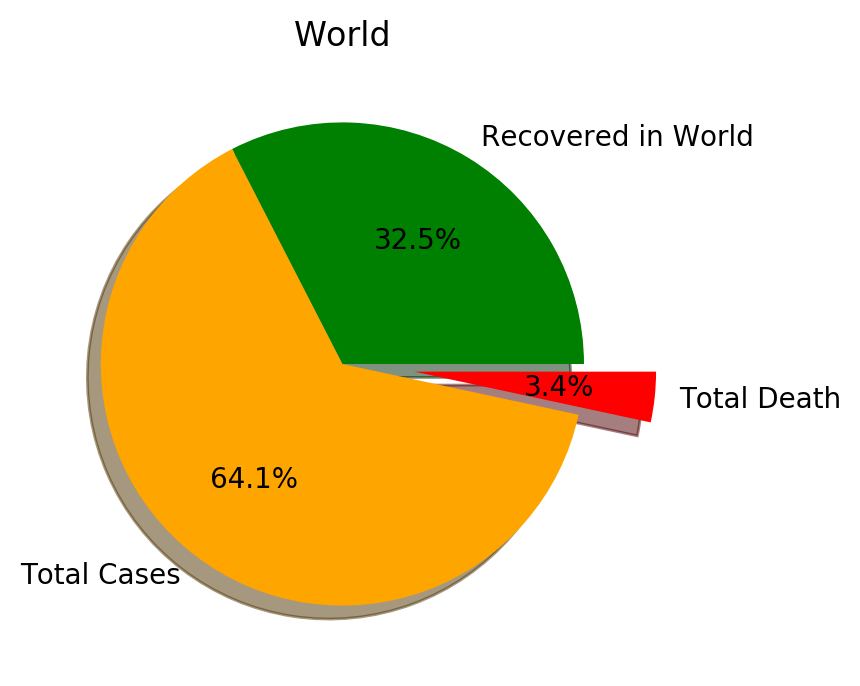

In [28]:
world={}
fig=plt.figure(dpi=200)
for column in today.columns[1:]:
    world[column]=today[column].sum()
world=pd.DataFrame(world,index=[1])
plt.pie(world[["total_recovered","total_cases","total_deaths",]],explode=[0,0,0.3],labels=["Recovered in World","Total Cases","Total Death"],colors=["green","orange","red"],shadow=True,autopct="%1.1f%%")
plt.title("World")
plt.show()

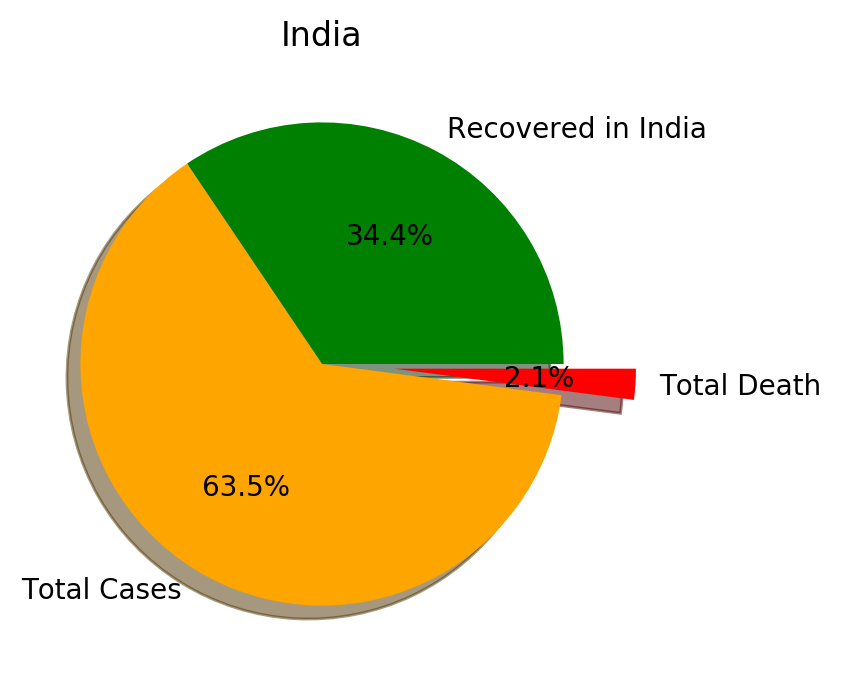

In [29]:
fig=plt.figure(dpi=200)
india=today.loc["India"]
plt.pie(india[["total_recovered","total_cases","total_deaths",]],explode=[0,0,0.3],labels=["Recovered in India","Total Cases","Total Death"],colors=["green","orange","red"],shadow=True,autopct="%1.1f%%")
plt.title("India")
plt.show()

<h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Completed</h2>